<a href="https://colab.research.google.com/github/NlChW/claims-annalysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


In [2]:
# Looks in Colab's current folder (/content) for the files
base = Path(".")

header_path = next(iter(base.glob("*_HEADER.csv")), None)
line_path   = next(iter(base.glob("*_LINE.csv")), None)
code_path   = next(iter(base.glob("*_CODE.csv")), None)

print("HEADER:", header_path)
print("LINE:  ", line_path)
print("CODE:  ", code_path)

if not header_path or not line_path or not code_path:
    raise FileNotFoundError("Upload the 3 CSVs into Colab Files first (left sidebar → Upload).")

df_header = pd.read_csv(header_path)
df_line   = pd.read_csv(line_path)
df_code   = pd.read_csv(code_path)

print("Loaded shapes:")
print("df_header:", df_header.shape)
print("df_line:  ", df_line.shape)
print("df_code:  ", df_code.shape)


HEADER: STONYBRK_20240531_HEADER.csv
LINE:   STONYBRK_20240531_LINE.csv
CODE:   STONYBRK_20240531_CODE.csv
Loaded shapes:
df_header: (388, 43)
df_line:   (520, 28)
df_code:   (1536, 9)


In [3]:
def explore_df(name, df):
    print("\n" + "="*80)
    print(name)
    print("="*80)
    print("Shape:", df.shape)
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nColumn names + dtypes:")
    display(df.dtypes)
    print("\nMissing values:")
    display(df.isna().sum().sort_values(ascending=False).head(20))
    print("\nDescriptive stats (numeric):")
    display(df.describe(include="number").T)

explore_df("df_header", df_header)
explore_df("df_line", df_line)
explore_df("df_code", df_code)



df_header
Shape: (388, 43)

First 5 rows:


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/25/23 0:00,9/25/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/27/23 0:00,9/27/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,UNITED COMMUNITY PLAN GOVT PROGRAM,405,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/29/23 0:00,9/29/23 0:00,MMIS,104,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,EMPIRE BLUE HMO,94,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN



Column names + dtypes:


,0
ClientId,int64
ProspectiveClaimId,int64
ClaimType,object
BillingProviderNPI,int64
BillingProvFirstName,object
BillingProvLastName,float64
AttendingProviderNPI,float64
AttendingProvFirstName,object
AttendingProvLastName,object
RenderingProviderNPI,int64



Missing values:


,0
BillingProvLastName,388
ReferralNo,388
InvestDeviceExmptNo,388
PriorAuthorizationNo,388
SecondaryPayerCFI,388
SecondaryPayerCode,388
SecondaryPayer,388
TertianaryPayer,388
OperatingProviderNPI,388
OperatingProvLastName,388



Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
ClientId,388.0,4.900000e+01,0.000000e+00,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
ProspectiveClaimId,388.0,3.670543e+07,3.562317e+05,3.521699e+07,3.669166e+07,3.683352e+07,3.688171e+07,3.700149e+07
BillingProviderNPI,388.0,1.462851e+09,3.247005e+08,1.063469e+09,1.154376e+09,1.437106e+09,1.821036e+09,1.982659e+09
BillingProvLastName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AttendingProviderNPI,2.0,1.472878e+09,6.069869e+08,1.043673e+09,1.258275e+09,1.472878e+09,1.687480e+09,1.902082e+09
RenderingProviderNPI,388.0,1.565732e+09,2.863497e+08,1.003467e+09,1.295152e+09,1.467003e+09,1.902082e+09,1.992124e+09
ReferringProviderNPI,87.0,1.538206e+09,2.676761e+08,1.003264e+09,1.391558e+09,1.518953e+09,1.780521e+09,1.992068e+09
OperatingProviderNPI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingProvFirstName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingProvLastName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



df_line
Shape: (520, 28)

First 5 rows:


,ClientId,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,DxMap1,DxMap2,DxMap3,DxMap4,ServiceDate,ServiceThruDate,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/27/2023,09/27/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/28/2023,09/28/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",1,2.0,3.0,4.0,09/28/2023,09/28/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",1,2.0,3.0,4.0,09/29/2023,09/29/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"



Column names + dtypes:


,0
ClientId,int64
ProspectiveClaimId,int64
LinePos,int64
RevCode,float64
HCPCS,object
Modifier1,object
Modifier2,object
Modifier3,float64
Modifier4,float64
DxMapDelim,object



Missing values:


,0
RevCode,520
Modifier3,520
Modifier4,520
NDC,520
NDCUnits,520
NDCRx,520
NDCUnitQualifier,520
RenderingProvNPI,520
Modifier2,482
DxMap4,353



Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
ClientId,520.0,4.900000e+01,0.000000,49.0,49.00,49.0,49.0,49.0
ProspectiveClaimId,520.0,3.672637e+07,327883.675965,35216986.0,36699456.75,36831015.5,36881711.0,37001489.0
LinePos,520.0,1.401923e+00,0.861282,1.0,1.00,1.0,2.0,7.0
RevCode,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modifier3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modifier4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DxMap1,520.0,1.150000e+00,0.576181,1.0,1.00,1.0,1.0,6.0
DxMap2,340.0,2.082353e+00,0.433461,1.0,2.00,2.0,2.0,6.0
DxMap3,232.0,3.064655e+00,0.446391,1.0,3.00,3.0,3.0,7.0
DxMap4,167.0,4.017964e+00,0.445500,1.0,4.00,4.0,4.0,8.0



df_code
Shape: (1536, 9)

First 5 rows:


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN



Column names + dtypes:


,0
ClientId,int64
ProspectiveClaimId,int64
CodeQualifier,object
CodePos,int64
CodeValue,object
CodeFromDate,float64
CodeToDate,float64
CodeAmnt,float64
POAInd,float64



Missing values:


,0
POAInd,1536
CodeToDate,1536
CodeAmnt,1536
CodeFromDate,1536
ClientId,0
CodeValue,0
CodePos,0
CodeQualifier,0
ProspectiveClaimId,0



Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
ClientId,1536.0,4.900000e+01,0.000000,49.0,49.0,49.0,49.0,49.0
ProspectiveClaimId,1536.0,3.655962e+07,470630.959446,35216986.0,36465551.0,36752505.0,36860231.0,37001489.0
CodePos,1536.0,3.666016e+00,2.735657,1.0,1.0,3.0,5.0,12.0
CodeFromDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CodeToDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CodeAmnt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POAInd,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
CLAIM_COL = "ProspectiveClaimId"  # from your instructions

# Convert service dates if present
for col in ["ServiceFromDate", "ServiceToDate"]:
    if col in df_header.columns:
        df_header[col] = pd.to_datetime(df_header[col], errors="coerce")

unique_claims = df_header[CLAIM_COL].nunique()
date_min = df_header["ServiceFromDate"].min() if "ServiceFromDate" in df_header.columns else None
date_max = df_header["ServiceToDate"].max() if "ServiceToDate" in df_header.columns else None

avg_lines_per_claim = df_line.groupby(CLAIM_COL).size().mean()
avg_dx_per_claim    = df_code.groupby(CLAIM_COL).size().mean()

print(f"Unique claims in HEADER: {unique_claims:,}")
print(f"Date range (ServiceFromDate → ServiceToDate): {date_min} → {date_max}")
print(f"Average service lines per claim (LINE): {avg_lines_per_claim:.2f}")
print(f"Average diagnosis codes per claim (CODE): {avg_dx_per_claim:.2f}")


Unique claims in HEADER: 388
Date range (ServiceFromDate → ServiceToDate): 2023-09-25 00:00:00 → 2024-05-29 00:00:00
Average service lines per claim (LINE): 1.34
Average diagnosis codes per claim (CODE): 3.96


/tmp/ipython-input-2855863402.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header[col] = pd.to_datetime(df_header[col], errors="coerce")
/tmp/ipython-input-2855863402.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header[col] = pd.to_datetime(df_header[col], errors="coerce")


Part 2: Questions

In [5]:
def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None


1) Top 5 billing providers by number of claims

Using columns: BillingProvFirstName BillingProviderNPI


,BillingProvFirstName,BillingProviderNPI,ClaimCount
3,SB INTERNISTS,1821035601,152
5,SB SURGICAL ASSOCIATES,1063468536,81
0,NEW YORK SPINE AND BRAIN SURGERY,1154376309,69
6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,1538114723,40
4,SB PSYCHIATRIC ASSOCIATES,1437105905,36


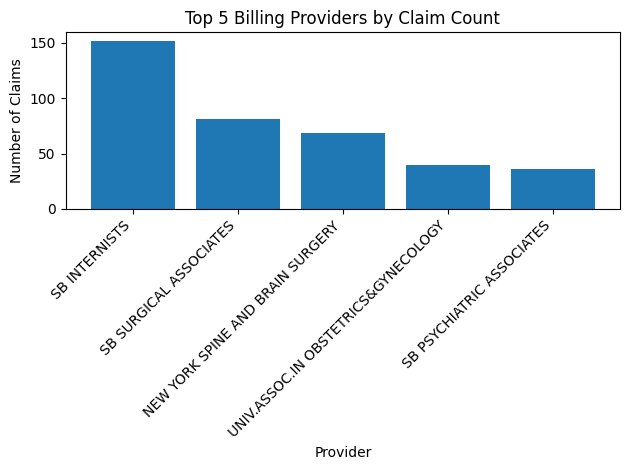

In [7]:
provider_name_col = pick_col(df_header, ["BillingProviderName", "ProviderName", "BillingProvider", "RenderingProviderName", "BillingProvFirstName"])
provider_npi_col  = pick_col(df_header, ["BillingProviderNPI", "BillingNPI", "ProviderNPI", "NPI"])

print("Using columns:", provider_name_col, provider_npi_col)

q1 = (df_header
      .groupby([provider_name_col, provider_npi_col])[CLAIM_COL]
      .nunique()
      .reset_index(name="ClaimCount")
      .sort_values("ClaimCount", ascending=False)
      .head(5))

display(q1)

plt.figure()
plt.bar(q1[provider_name_col].astype(str), q1["ClaimCount"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 5 Billing Providers by Claim Count")
plt.ylabel("Number of Claims")
plt.xlabel("Provider")
plt.tight_layout()
plt.show()

2) Top 5 primary payers + percentage distribution

Using payer column: PrimaryPayerName


,PrimaryPayerName,ClaimCount,PercentOfTotalClaims
0,MEDICARE,242,62.37
1,HEALTHFIRST FFS,46,11.86
2,FIDELIS/BETTER HEALTH PLAN,26,6.70
3,HIP MEDICAID,17,4.38
4,HEALTHFIRST CAPITATED,10,2.58


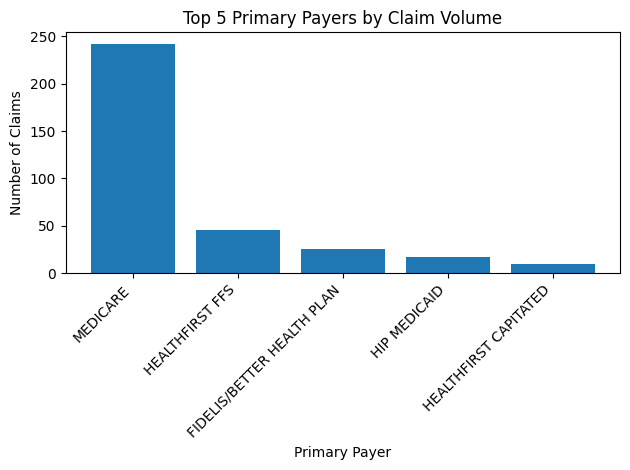

In [8]:
payer_col = pick_col(df_header, ["PrimaryPayerName", "PrimaryPayer", "PayerName"])
print("Using payer column:", payer_col)

payer_counts = df_header.groupby(payer_col)[CLAIM_COL].nunique().sort_values(ascending=False)
top5 = payer_counts.head(5).reset_index(name="ClaimCount")
top5["PercentOfTotalClaims"] = (top5["ClaimCount"] / payer_counts.sum() * 100).round(2)

display(top5)

plt.figure()
plt.bar(top5[payer_col].astype(str), top5["ClaimCount"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 5 Primary Payers by Claim Volume")
plt.ylabel("Number of Claims")
plt.xlabel("Primary Payer")
plt.tight_layout()
plt.show()


3) 10 most common diagnosis codes (ICD-10)

In [9]:
dx_col = pick_col(df_code, ["CodeValue", "DxCode", "DiagnosisCode"])
print("Using dx code column:", dx_col)

q3 = (df_code.groupby(dx_col)[CLAIM_COL]
      .nunique()
      .sort_values(ascending=False)
      .head(10)
      .reset_index(name="ClaimFrequency"))

display(q3)


Using dx code column: CodeValue


,CodeValue,ClaimFrequency
0,J96.01,62
1,E78.5,49
2,I10,49
3,G93.5,34
4,D64.9,29
5,I25.10,27
6,I61.9,26
7,I48.91,24
8,I60.8,24
9,I50.9,22


4) 10 most common procedures (HCPCS) + bar chart

Using procedure column: HCPCS


,HCPCS,ClaimFrequency
0,99291,68
1,99233,48
2,99213,39
3,99223,33
4,99222,32
5,99232,21
6,90833,16
7,92557,14
8,99204,14
9,99214,14


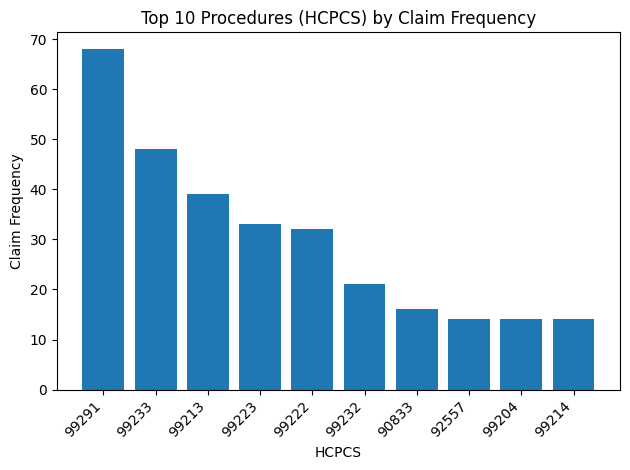

In [10]:
hcpcs_col = pick_col(df_line, ["HCPCS", "CPT", "ProcedureCode"])
print("Using procedure column:", hcpcs_col)

q4 = (df_line.groupby(hcpcs_col)[CLAIM_COL]
      .nunique()
      .sort_values(ascending=False)
      .head(10)
      .reset_index(name="ClaimFrequency"))

display(q4)

plt.figure()
plt.bar(q4[hcpcs_col].astype(str), q4["ClaimFrequency"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Procedures (HCPCS) by Claim Frequency")
plt.ylabel("Claim Frequency")
plt.xlabel("HCPCS")
plt.tight_layout()
plt.show()


5) Place of Service counts + % inpatient vs doctor’s office

In [11]:
pos_col = pick_col(df_header, ["PlaceOfService", "POS", "PlaceOfServiceName"])
print("Using PlaceOfService column:", pos_col)

pos_counts = df_header.groupby(pos_col)[CLAIM_COL].nunique().sort_values(ascending=False)
display(pos_counts.reset_index(name="ClaimCount"))

# inpatient vs doctor's office % (only if those exact values exist)
pos_subset = df_header[df_header[pos_col].isin(["INPATIENT", "DOCTOR'S OFFICE"])]
pos_two = pos_subset.groupby(pos_col)[CLAIM_COL].nunique()
pos_two_pct = (pos_two / pos_two.sum() * 100).round(2)

print("\nINPATIENT vs DOCTOR'S OFFICE (percent of those two only):")
display(pos_two_pct.reset_index(name="Percent"))


Using PlaceOfService column: PlaceOfService


,PlaceOfService,ClaimCount
0,21,231
1,11,132
2,22,24
3,23,1



INPATIENT vs DOCTOR'S OFFICE (percent of those two only):


,PlaceOfService,Percent


Part 3

6) Claims with 5+ service lines + total charges

In [12]:
charges_col = pick_col(df_line, ["Charges", "LineCharges", "ChargeAmount"])
print("Using charges column:", charges_col)

df_line[charges_col] = pd.to_numeric(df_line[charges_col], errors="coerce")

# Total lines and total charges per claim
line_agg = (df_line.groupby(CLAIM_COL)
            .agg(ServiceLineCount=(hcpcs_col, "size"),
                 TotalCharges=(charges_col, "sum"))
            .reset_index())

# Merge to bring provider name
merged_h_l = df_header.merge(line_agg, on=CLAIM_COL, how="left")

q6 = (merged_h_l[merged_h_l["ServiceLineCount"] >= 5]
      [[CLAIM_COL, provider_name_col, "ServiceLineCount", "TotalCharges"]]
      .sort_values(["ServiceLineCount","TotalCharges"], ascending=False))

display(q6.head(20))


Using charges column: Charges


,ProspectiveClaimId,BillingProvFirstName,ServiceLineCount,TotalCharges
333,36794825,SB CHILDREN'S SERVICE,7,1163
138,36668119,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,1030
122,36740402,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,945
23,36710175,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873
217,36757684,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873


7) Most common diagnosis code associated with CPT/HCPCS 99291 (merge all 3)

In [13]:
target_cpt = "99291"

# Keep only claim IDs where LINE contains 99291
claims_with_99291 = df_line.loc[df_line[hcpcs_col].astype(str) == target_cpt, [CLAIM_COL]].drop_duplicates()

# Join to CODE to get diagnoses for those claims
dx_for_99291 = claims_with_99291.merge(df_code[[CLAIM_COL, dx_col]], on=CLAIM_COL, how="inner")

q7 = (dx_for_99291.groupby(dx_col)[CLAIM_COL]
      .nunique()
      .sort_values(ascending=False)
      .head(10)
      .reset_index(name="ClaimFrequency"))

print("Top diagnoses associated with CPT/HCPCS 99291:")
display(q7)

print("\nMost common diagnosis for 99291:", q7.iloc[0][dx_col] if len(q7) else "None found")


Top diagnoses associated with CPT/HCPCS 99291:


,CodeValue,ClaimFrequency
0,J96.01,53
1,G93.5,34
2,E78.5,33
3,I61.9,26
4,D64.9,25
5,I60.8,24
6,I10,24
7,I95.9,20
8,D72.829,19
9,I67.848,17



Most common diagnosis for 99291: J96.01


8) Charges by Payer

In [14]:
# We already built line_agg (TotalCharges per claim). Use that to avoid double-counting.
payer_charges = (df_header[[CLAIM_COL, payer_col]]
                 .merge(line_agg[[CLAIM_COL, "TotalCharges"]], on=CLAIM_COL, how="left"))

q8 = (payer_charges.groupby(payer_col)
      .agg(TotalCharges=("TotalCharges", "sum"),
           AvgChargesPerClaim=("TotalCharges", "mean"),
           NumClaims=(CLAIM_COL, "nunique"))
      .reset_index()
      .sort_values("TotalCharges", ascending=False)
      .head(10))

display(q8)


,PrimaryPayerName,TotalCharges,AvgChargesPerClaim,NumClaims
17,MEDICARE,131008,541.355372,242
12,HEALTHFIRST FFS,29794,647.695652,46
9,FIDELIS/BETTER HEALTH PLAN,10810,415.769231,26
14,HIP MEDICAID,10014,589.058824,17
0,AETNA,6930,1155.000000,6
4,DIRECT SELF PAY,6575,1095.833333,6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,1035.000000,5
10,HEALTHFIRST CAPITATED,4905,490.500000,10
7,EMPIRE BLUE SR,4620,1155.000000,4
15,MAGNACARE,3465,1155.000000,3


9) “Creative Analysis” Do claims with more diagnosis codes tend to have higher total charges?

,ProspectiveClaimId,PrimaryPayerName,PlaceOfService,TotalCharges,DxCount
0,35216986,AETNA,21,1155,10
1,35235657,AETNA,21,1155,10
2,35249003,UNITED COMMUNITY PLAN GOVT PROGRAM,21,1155,6
3,35249014,MMIS,21,1155,6
4,35249016,EMPIRE BLUE HMO,21,1155,6


,DxCount,NumClaims,AvgTotalCharges
0,1,86,438.302326
1,2,75,513.013333
2,3,62,470.983871
3,4,51,590.333333
4,5,27,497.407407
5,6,13,647.307692
6,7,14,968.214286
7,8,16,967.062500
8,9,12,1155.000000
9,10,8,1042.500000


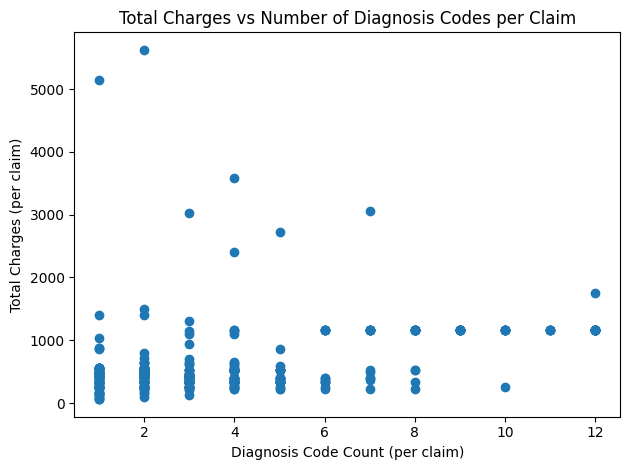

Interpretation (write 2-4 sentences): Claims with more diagnosis codes often represent more complex cases, so we check whether TotalCharges increases as DxCount increases.


In [15]:
# Dx count per claim
dx_count = df_code.groupby(CLAIM_COL).size().reset_index(name="DxCount")

# Combine: HEADER + TotalCharges (from LINE) + DxCount (from CODE)
creative = (df_header[[CLAIM_COL, payer_col, pos_col]]
            .merge(line_agg[[CLAIM_COL, "TotalCharges"]], on=CLAIM_COL, how="left")
            .merge(dx_count, on=CLAIM_COL, how="left"))

creative["DxCount"] = creative["DxCount"].fillna(0)

display(creative.head())

# Summary table by DxCount
summary = (creative.groupby("DxCount")
           .agg(NumClaims=(CLAIM_COL, "nunique"),
                AvgTotalCharges=("TotalCharges", "mean"))
           .reset_index()
           .sort_values("DxCount"))

display(summary.head(15))

# Visualization (scatter)
plt.figure()
plt.scatter(creative["DxCount"], creative["TotalCharges"])
plt.title("Total Charges vs Number of Diagnosis Codes per Claim")
plt.xlabel("Diagnosis Code Count (per claim)")
plt.ylabel("Total Charges (per claim)")
plt.tight_layout()
plt.show()

print("Interpretation (write 2-4 sentences): Claims with more diagnosis codes often represent more complex cases, so we check whether TotalCharges increases as DxCount increases.")
